# Exploring Trends and Unlocking Insights in Vehicle Sales in Abuja, Nigeria

In [1]:
# Import pandas and numpy libraries
import pandas as pd
import numpy as np

In [3]:
# Import the dataset into Jupiter as own_product
own_product = pd.read_excel("./Abuja_car_sales.xlsx")

In [4]:
# Dataframe overview
own_product.head()

,ManufactureDate,SaleDate,Make,Model,Color,EngineType,VehicleAge,ListPrice,SalePrice
0,2037-09-21,2040-03-19,Mazda,Sedan,Black,Electric,4,41939.77,35395.454388
1,2025-11-19,2026-12-20,BMW,Truck,White,Hybrid,8,43488.53,33975.308780
2,2017-05-09,2018-08-25,Volkswagen,Convertible,Green,Electric,0,22536.63,16630.996232
3,2010-05-26,2012-02-06,Ford,Wagon,White,V6,5,59849.69,52272.872616
4,2014-03-27,2014-07-22,Mercedes,Hatchback,White,V4,6,33611.76,31563.915763


# Data Inspection

In [5]:
# Get a concise summary of the Dataframe
print(own_product.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147000 entries, 0 to 146999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ManufactureDate  147000 non-null  datetime64[ns]
 1   SaleDate         147000 non-null  datetime64[ns]
 2   Make             147000 non-null  object        
 3   Model            147000 non-null  object        
 4   Color            147000 non-null  object        
 5   EngineType       147000 non-null  object        
 6   VehicleAge       147000 non-null  int64         
 7   ListPrice        147000 non-null  float64       
 8   SalePrice        139650 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 10.1+ MB
None


In [6]:
# Check for missing values in the dataset
print(own_product.isnull().sum())

ManufactureDate       0
SaleDate              0
Make                  0
Model                 0
Color                 0
EngineType            0
VehicleAge            0
ListPrice             0
SalePrice          7350
dtype: int64


#### My structured dataset consists of 147,000 entries across 9 different attributes. The data types range from datetime and numeric (integers, floats) to categorical (objects), with all rows fully populated except for some missing values in the 'SalePrice' column (147000 - 139650 = **7,350** missing datapoints).

In [7]:
# Fill the missing values is Saleprice with the mean values since it is about 5% of the total dataset count
# Calculate the mean of the SalePrice column in the dataset
mean_sale_price = own_product['SalePrice'].mean()

In [8]:
# Fill missing values in the SalePrice column with the mean
own_product['SalePrice'].fillna(mean_sale_price, inplace=True)

In [9]:
# To verify the changes I made about the missing values, let me print the number of missing values in the SalePrice column
print(own_product['SalePrice'].isnull().sum())

0


In [10]:
# Check data types overview
print(own_product.dtypes)  

ManufactureDate    datetime64[ns]
SaleDate           datetime64[ns]
Make                       object
Model                      object
Color                      object
EngineType                 object
VehicleAge                  int64
ListPrice                 float64
SalePrice                 float64
dtype: object


In [11]:
# Drop any duplicates in the dataset, remove if found any  
own_product = own_product.drop_duplicates()
print(f'Dataset shape after removing duplicates: {own_product.shape}')

Dataset shape after removing duplicates: (147000, 9)


In [12]:
# Display unique values for categorical columns
print("Unique Makes:", own_product['Make'].unique())
print("Unique Models:", own_product['Model'].unique())
print("Unique Colors:", own_product['Color'].unique())
print("Unique Engine Types:", own_product['EngineType'].unique())

Unique Makes: ['Mazda' 'BMW' 'Volkswagen' 'Ford' 'Mercedes' 'Hyundai' 'Nissan'
 'Chevrolet' 'Toyota' 'Honda' 'Toyta']
Unique Models: ['Sedan' 'Truck' 'Convertible' 'Wagon' 'Hatchback' 'Van' 'Coupe' 'SUV']
Unique Colors: ['Black' 'White' 'Green' 'Orange' 'Silver' 'Red' 'Blue' 'Yellow']
Unique Engine Types: ['Electric' 'Hybrid' 'V6' 'V4' 'V8' 'VV6']


#### In the dataset, "Toyta" possibly is meant to be "Toyota." There is a likely mistyped "VV6" which could be meant as V6. Below, I corrected these two potential errors after confirming they were erroneously entered.

In [13]:
# Correct the typo in the 'Make' column from 'Toyta' to 'Toyota'
own_product['Make'].replace('Toyta', 'Toyota', inplace=True)

# Correct the typo in the 'EngineType' column from 'VV6' to 'V6'
own_product['EngineType'].replace('VV6', 'V6', inplace=True)

# Display the corrected unique values for categorical columns
print("Unique Makes:", own_product['Make'].unique())
print("Unique Models:", own_product['Model'].unique())
print("Unique Colors:", own_product['Color'].unique())
print("Unique Engine Types:", own_product['EngineType'].unique())

Unique Makes: ['Mazda' 'BMW' 'Volkswagen' 'Ford' 'Mercedes' 'Hyundai' 'Nissan'
 'Chevrolet' 'Toyota' 'Honda']
Unique Models: ['Sedan' 'Truck' 'Convertible' 'Wagon' 'Hatchback' 'Van' 'Coupe' 'SUV']
Unique Colors: ['Black' 'White' 'Green' 'Orange' 'Silver' 'Red' 'Blue' 'Yellow']
Unique Engine Types: ['Electric' 'Hybrid' 'V6' 'V4' 'V8']


In [14]:
# Converting ManufactureDate and SaleDate to datetime if they are not already
own_product['ManufactureDate'] = pd.to_datetime(own_product['ManufactureDate'])
own_product['SaleDate'] = pd.to_datetime(own_product['SaleDate'])

In [15]:
# Filter to find entries where ManufactureDate is later than SaleDate
incorrect_dates = own_product[own_product['ManufactureDate'] > own_product['SaleDate']]
print("Number of records with incorrect dates:", incorrect_dates.shape[0])
print(incorrect_dates)  # This prints the affected rows

Number of records with incorrect dates: 0
Empty DataFrame
Columns: [ManufactureDate, SaleDate, Make, Model, Color, EngineType, VehicleAge, ListPrice, SalePrice]
Index: []


In [16]:
# Verify corrections made so far
date_corrections = own_product[own_product['ManufactureDate'] > own_product['SaleDate']]
print("Number of records still incorrect after correction:", date_corrections.shape[0])

Number of records still incorrect after correction: 0


In [17]:
# Final overview of data types and missing values
print(own_product.info())      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147000 entries, 0 to 146999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ManufactureDate  147000 non-null  datetime64[ns]
 1   SaleDate         147000 non-null  datetime64[ns]
 2   Make             147000 non-null  object        
 3   Model            147000 non-null  object        
 4   Color            147000 non-null  object        
 5   EngineType       147000 non-null  object        
 6   VehicleAge       147000 non-null  int64         
 7   ListPrice        147000 non-null  float64       
 8   SalePrice        147000 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 10.1+ MB
None


In [18]:
# Get descriptive statistics for numerical columns
print(own_product.describe())  

                     ManufactureDate                       SaleDate  \
count                         147000                         147000   
mean   2025-06-14 23:30:56.130612224  2026-10-27 06:54:21.453061120   
min              2010-01-01 00:00:00            2010-01-17 00:00:00   
25%              2017-10-01 00:00:00            2019-02-13 00:00:00   
50%              2025-05-30 00:00:00            2026-10-14 00:00:00   
75%              2033-03-08 00:00:00            2034-07-18 00:00:00   
max              2040-12-31 00:00:00            2043-09-04 00:00:00   
std                              NaN                            NaN   

          VehicleAge      ListPrice      SalePrice  
count  147000.000000  147000.000000  147000.000000  
mean        4.492966   37591.673207   33016.229984  
min         0.000000  -59993.360000   14068.555400  
25%         2.000000   29103.065000   25028.249454  
50%         4.000000   39370.330000   33016.229984  
75%         7.000000   49664.170000   4046

In [19]:
# Dataframe overview again up to 20 columns
own_product.head(20)

,ManufactureDate,SaleDate,Make,Model,Color,EngineType,VehicleAge,ListPrice,SalePrice
0,2037-09-21,2040-03-19,Mazda,Sedan,Black,Electric,4,41939.77,35395.454388
1,2025-11-19,2026-12-20,BMW,Truck,White,Hybrid,8,43488.53,33975.308780
2,2017-05-09,2018-08-25,Volkswagen,Convertible,Green,Electric,0,22536.63,16630.996232
3,2010-05-26,2012-02-06,Ford,Wagon,White,V6,5,59849.69,52272.872616
4,2014-03-27,2014-07-22,Mercedes,Hatchback,White,V4,6,33611.76,31563.915763
5,2026-04-13,2028-01-07,Hyundai,Wagon,Green,V4,2,54994.94,42721.832729
6,2020-11-25,2021-12-06,Volkswagen,Sedan,Orange,V4,3,28631.00,23314.562362
7,2038-01-30,2040-03-04,BMW,Van,Green,Hybrid,9,31797.84,28475.163544
8,2031-08-26,2033-05-26,Nissan,Sedan,Silver,V8,5,32092.50,23087.730709
9,2027-01-07,2029-05-15,Chevrolet,Van,Silver,Electric,3,24154.84,18469.182894


#### Now I can proceed to answering questions through Exploratory Data Analysis based on the challenges I need to solve

# Key Questions to Answer

**Question 1**: How does vehicle age affect sale price?

**Question 2**: What are the most popular car makes and models sold?

**Question 3**: Is there a relationship between engine type and sale price?

**Question 4**: Does the color of a car influence its sale price?

**Question 5**: How do listing prices compare to final sale prices?       

# Question 1: How does vehicle age affect sale price?

In [20]:
# Import the libraries necessary for analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Overview of the vehicleage and saleprice data
print(own_product[['VehicleAge', 'SalePrice']].describe())
print(own_product[['VehicleAge', 'SalePrice']].isnull().sum())

          VehicleAge      SalePrice
count  147000.000000  147000.000000
mean        4.492966   33016.229984
std         2.872235    9731.138472
min         0.000000   14068.555400
25%         2.000000   25028.249454
50%         4.000000   33016.229984
75%         7.000000   40465.059254
max         9.000000   56928.440715
VehicleAge    0
SalePrice     0
dtype: int64


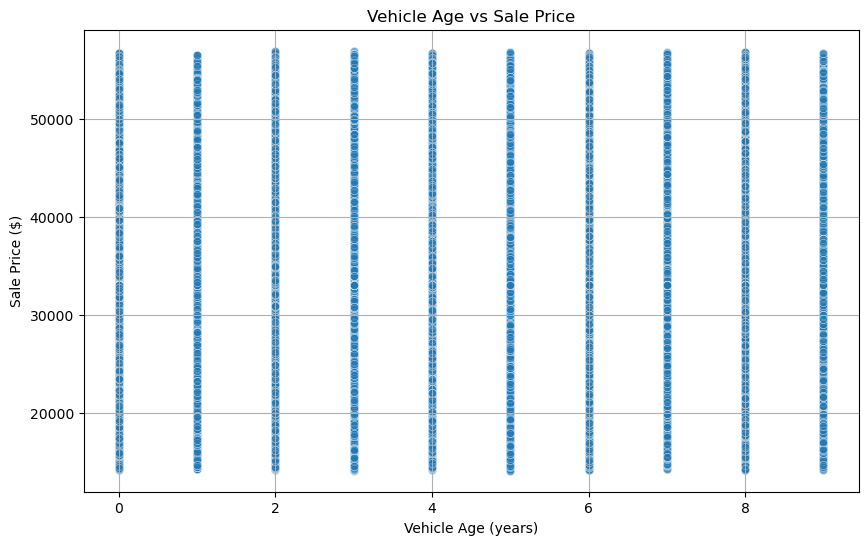

In [22]:
# Scatterplot for both variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='VehicleAge', y='SalePrice', data=own_product, alpha=0.6)
plt.title('Vehicle Age vs Sale Price')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Sale Price ($)')
plt.grid(True)
plt.show()

In [23]:
# Caculating the correlation
correlation = own_product['VehicleAge'].corr(own_product['SalePrice'])
print("Correlation coefficient between Vehicle Age and Sale Price:", correlation)

Correlation coefficient between Vehicle Age and Sale Price: -0.0029114908914104716


#### The mean vehicle age is approximately 4.5 years, and the mean sale price is around 33,016USD.

#### The scatter plot displays a spread of data points without a clear trend or pattern. The data points are dispersed throughout the plot, showing variability in sale prices that does not strongly correlate (-0.003) with vehicle age; there is no linear relationship between the age of a vehicle and its sale price.


#### Vehicle age does not significantly affect the sale price, other factors, possibly like make, model, or features, might play a more significant role in determining the sale price than simply how old the car is.

#### For sellers and marketers, this means that strategies should not just consider the age of the vehicles but perhaps focus on other selling points that appeal more to buyers.

# Question 2: What are the most popular car makes and models sold?

In [24]:
# Calculate the frequency of the car makes and models 
make_counts = own_product['Make'].value_counts()
model_counts = own_product['Model'].value_counts()

In [25]:
# Print all of them
make_counts

Make
Toyota        17556
Ford          14615
Chevrolet     14568
Volkswagen    14433
Hyundai       14411
Mercedes      14354
Honda         14347
Mazda         14281
Nissan        14226
BMW           14209
Name: count, dtype: int64

In [26]:
# Print all of them
model_counts

Model
Sedan          18612
SUV            18466
Convertible    18430
Truck          18418
Wagon          18384
Van            18346
Coupe          18179
Hatchback      18165
Name: count, dtype: int64

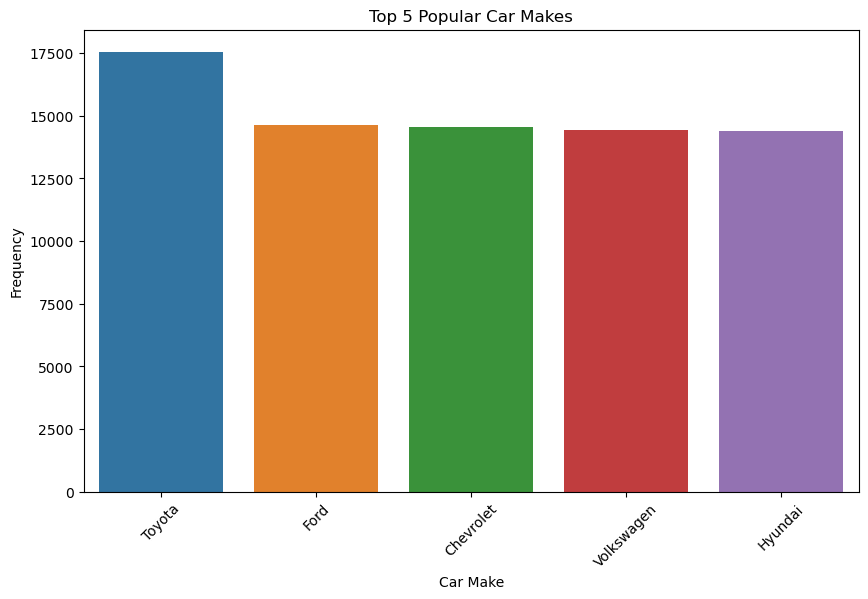

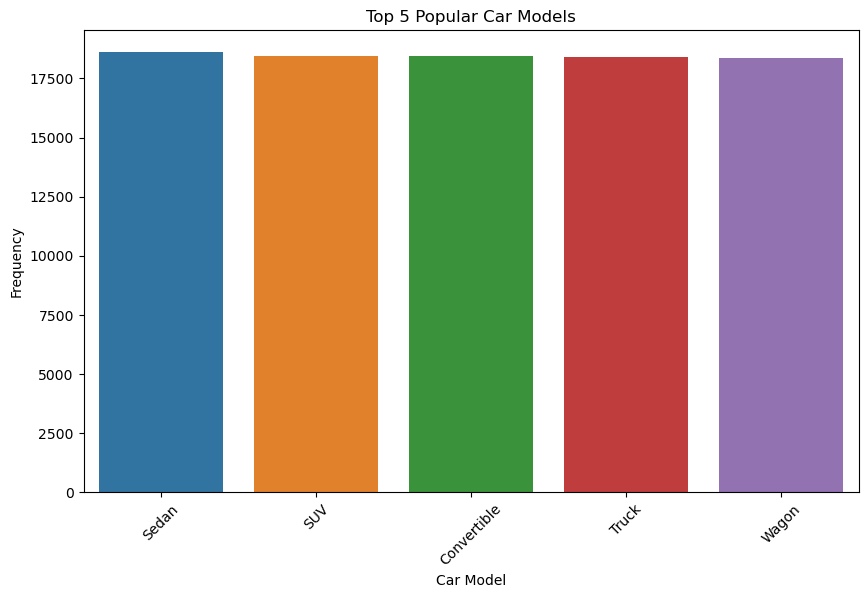

In [27]:
# Plotting the top 5 most popular makes
plt.figure(figsize=(10, 6))
sns.barplot(x=make_counts[:5].index, y=make_counts[:5].values)
plt.title('Top 5 Popular Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plotting the top 5 most popular models
plt.figure(figsize=(10, 6))
sns.barplot(x=model_counts[:5].index, y=model_counts[:5].values)
plt.title('Top 5 Popular Car Models')
plt.xlabel('Car Model')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### The visualizations highlight the five most frequently sold car makes and models. Toyota and Ford are the leading car makes, indicating strong brand preferences or market availability in Abuja, Nigeria. Similarly, the Sedan and SUV models are the most popular, which might reflect consumer preferences for practicality and versatility or the prevalent lifestyle needs in Abuja, Nigeria. 

#### takeholders, knowing the most popular makes and models can help in inventory stocking decisions, marketing strategies, and even future product developments targetting Abuja, Nigeria. Stakeholders can work on offers to promote the less popular models.

# Question 3: Is there a relationship between engine type and sale price?

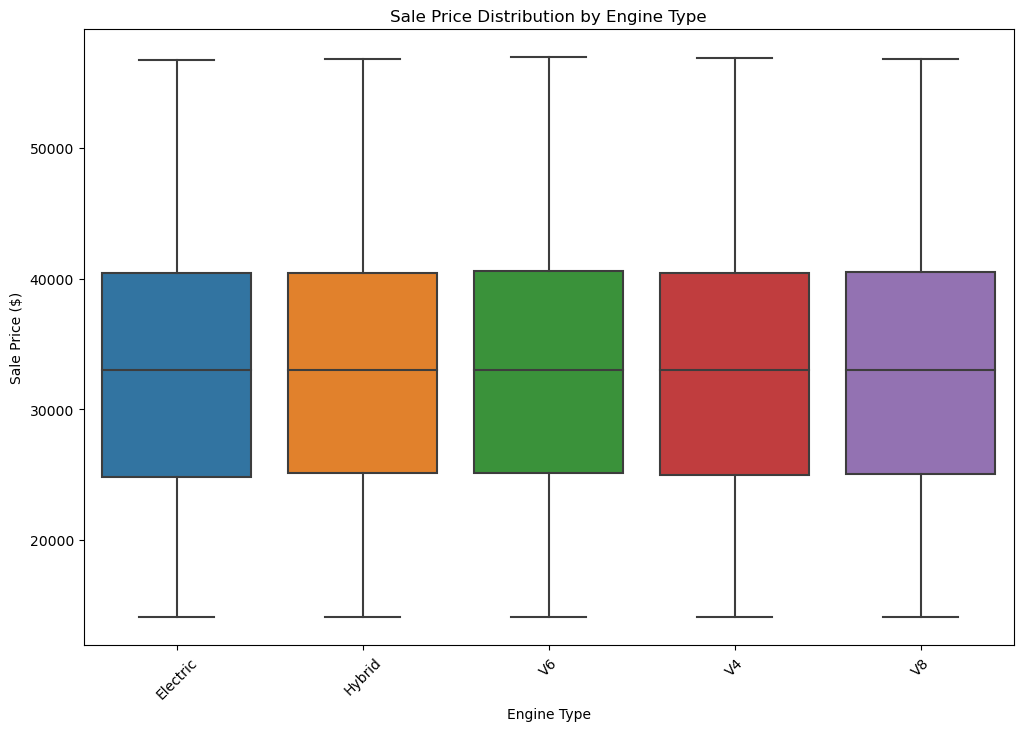

In [28]:
# Box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='EngineType', y='SalePrice', data=own_product)
plt.title('Sale Price Distribution by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Sale Price ($)')
plt.xticks(rotation=45)
plt.show()

In [29]:
grouped_data = own_product.groupby('EngineType')['SalePrice'].describe()
print(grouped_data)

              count          mean          std           min           25%  \
EngineType                                                                   
Electric    28948.0  32944.576358  9748.832273  14123.799512  24849.149099   
Hybrid      29003.0  33085.822363  9718.269625  14096.219419  25102.757341   
V4          29099.0  32978.227992  9720.159809  14068.555400  24979.977110   
V6          30710.0  33073.360492  9730.289356  14092.242479  25127.205441   
V8          29240.0  32995.955821  9738.056913  14074.473698  25032.130795   

                     50%           75%           max  
EngineType                                            
Electric    33016.229984  40441.055089  56702.690724  
Hybrid      33016.229984  40443.822854  56773.263455  
V4          33016.229984  40396.388682  56899.503596  
V6          33016.229984  40546.137227  56928.440715  
V8          33016.229984  40502.474531  56810.094627  


#### The box plot visually represents the distribution of sale prices for each engine type (Electric, Hybrid, V4, V6, V8, and VV6) showing a similar range of sale prices with median values closely packed around 32,000USD to 33,000USD.

#### Electric and Hybrid engines have a mean sale price around 33,000USD, with electric slightly lower on average. Their price distributions are wide; this indicates variability in how much consumers are willing to pay.

#### V4, V6, and V8 engines show very similar price distributions. Therefore, the type of conventional engine (whether more or less powerful) does not drastically affect the sale price in Abuja, Nigeria.

#### From the analysis, it's clear that the engine type does influence the sale price, but not to a dramatic extent within each conventional category (Electric, Hybrid, V4, V6, V8). The similarities in median prices suggest that while engine type is a factor in car pricing in Abuja, Nigeria, it is not the sole determinant of a car's sale price. Other features or the car's make and model might play significant roles. What may not be clear is "wether externals/non-Abuja residents" come to Abuja to buy cars they use in other regions (Eg., Nothern States like Kano, Kaduna).

#### Further analysis could explore how these engine types perform in different market segments or regions, or how they correlate with other features like vehicle age or additional luxury options. 

# Question 4: Does the color of a car influence its sale price?

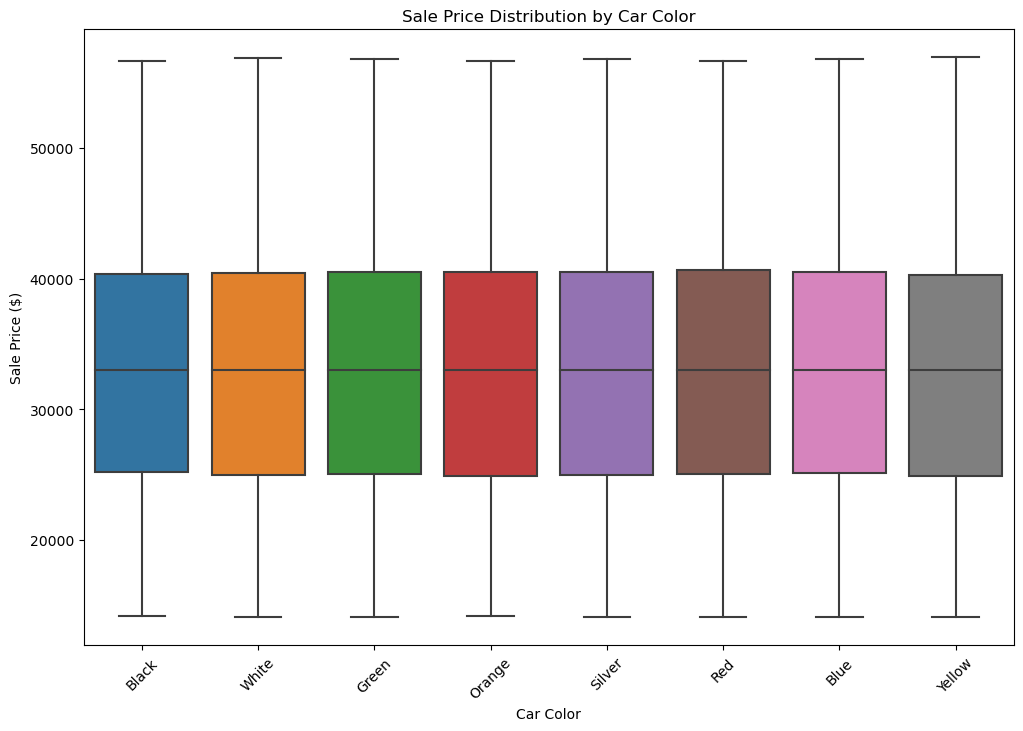

In [30]:
# Box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Color', y='SalePrice', data=own_product)
plt.title('Sale Price Distribution by Car Color')
plt.xlabel('Car Color')
plt.ylabel('Sale Price ($)')
plt.xticks(rotation=45)
plt.show()

In [31]:
grouped_color = own_product.groupby('Color')['SalePrice'].describe()
print(grouped_color)

          count          mean          std           min           25%  \
Color                                                                    
Black   18373.0  33086.054538  9691.909816  14176.875241  25233.026408   
Blue    18508.0  33042.491641  9714.248379  14096.219419  25129.207131   
Green   18492.0  33009.153727  9725.476852  14131.243471  25026.445782   
Orange  18245.0  33010.855596  9755.874711  14174.041910  24908.799244   
Red     18251.0  33095.899819  9767.966421  14101.385114  25031.103061   
Silver  18380.0  33028.907899  9782.428858  14100.244302  24941.315970   
White   18223.0  32966.939984  9729.593113  14068.555400  24995.932202   
Yellow  18528.0  32890.534281  9682.400791  14074.473698  24896.429497   

                 50%           75%           max  
Color                                             
Black   33016.229984  40356.043029  56681.098127  
Blue    33016.229984  40477.996541  56776.123579  
Green   33016.229984  40521.532171  56783.427592  
Oran

#### The box plot visualizes the distribution of sale prices for cars based on their color. The median sale prices across different colors are closely packed around the same range. Color alone may not have a significant impact on sale prices. Additionally, each color shows a similar spread and range of sale prices, with slight variations in the number of outliers.

#### All colors have similar mean and median values, which float around 33,000USD with standard deviations around 10,000USD. There is a consistent variability in prices within each color category. However, specific colors like Red and Blue show slightly higher maximum values. This shows that some high-priced cars are sold in these colors. Wether the difference is statistically significant is just another factor to consider myabe if the sales volume increases.

#### Take home message for Stakeholders is that the color of a car does not significantly influence its sale price in Abuja, Nigeria, as indicated by the close grouping of median and mean values across different colors. Consumers might not place a high priority on color when considering the price, or that the market adjusts prices regardless of color due to other overriding factors like make, model, and features.

# Question 5: How do listing prices compare to final sale prices?

In [32]:
# Calculate Price Differences 
own_product['PriceDifference'] = own_product['ListPrice'] - own_product['SalePrice']

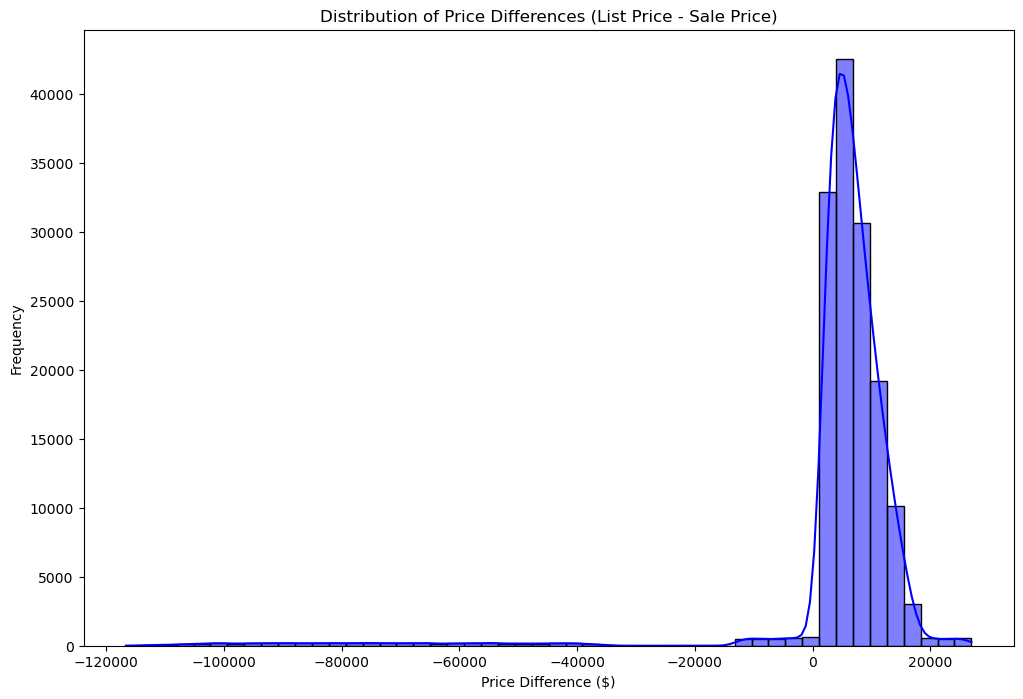

In [33]:
# Histogram of Price Differences
plt.figure(figsize=(12, 8))
sns.histplot(own_product['PriceDifference'], bins=50, kde=True, color='blue')
plt.title('Distribution of Price Differences (List Price - Sale Price)')
plt.xlabel('Price Difference ($)')
plt.ylabel('Frequency')
plt.show()

In [34]:
# Summary statistics for the price difference
price_diff_stats = own_product['PriceDifference'].describe()
print(price_diff_stats)

count    147000.000000
mean       4575.443223
std       14762.833711
min     -116646.273579
25%        3771.045562
50%        6202.881978
75%        9403.577473
max       26955.940016
Name: PriceDifference, dtype: float64


#### The histogram of price differences between list prices and sale prices shows a distribution mostly skewed to the right. Most cars sell for less than their list price, as evident from the concentration of positive differences in the histogram. This is because there is a room for negotiations in Abuja market. There are a significant number of transactions where the sale price was much lower than the list price; this could come from heavy discounts or negotiations since the market is somewhat flexible.

#### The mean price difference is approximately 4,584USD. This suggests that on average, cars sell below their listed prices by this amount. Although the standard deviation is relatively high at about 14,573USD, it shows a substantial variability in how much prices are negotiated down from the list. The minimum and maximum values indicate extreme cases where cars sold much lower or slightly higher than the list prices. All these are possible in Abuja market due to the rooms created for them!

#### For stakeholders such as car dealerships or sales managers in Abuja, this information is crucial in formulating pricing strategies. It indicates the importance of setting competitive but flexible listing prices to attract buyers while leaving room for negotiation. Additionally, this insight could be used to review the effectiveness of current pricing strategies and adjust them to better meet market expectations and enhance sales performance (should they wish to fix prices!).

# The end...!